In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xlrd
%matplotlib inline

#   Ignoring any warnings.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
transaction_data=pd.read_excel("QVI_transaction_data.xlsx") #   Reading the Excel Workbook file into a pandas.DataFrame.
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
transaction_data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


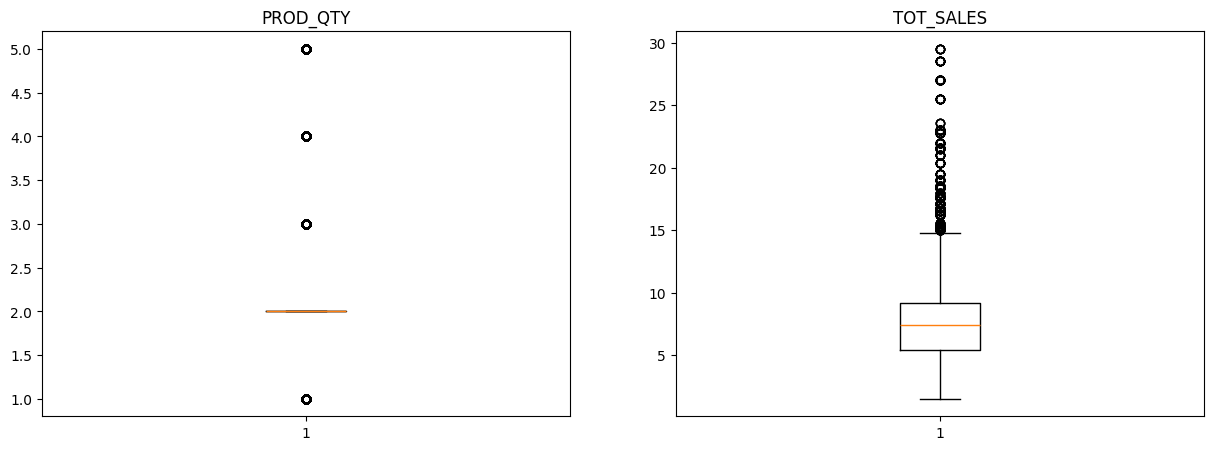

In [ ]:
#   Checking for any outliers in the pandas.DataFrame using a box plot of the PROD_QTY and TOT_SALES column.

figure, axis=plt.subplots(1, 2, figsize=(15, 5))
axis[0].boxplot(transaction_data["PROD_QTY"])
axis[1].boxplot(transaction_data["TOT_SALES"])
axis[0].set_title("PROD_QTY")
axis[1].set_title("TOT_SALES")
plt.show()

In [ ]:
#   Removing the outliers from the pandas.DataFrame.

transaction_data=transaction_data[transaction_data["PROD_QTY"]<100]
transaction_data=transaction_data[transaction_data["TOT_SALES"]<500]
transaction_data=transaction_data.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
date=transaction_data["DATE"].tolist()  #   Storing the DATE column as a list.

#   Converting the Microsoft Excel serial date format to the datetime format.

for i in range(len(date)):
    date[i]=xlrd.xldate_as_datetime(date[i], 0)

transaction_data["DATE"]=date   #   Replacing the DATE column with its corresponding datetime format entries.
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
purchase_behaviour=pd.read_csv("QVI_purchase_behaviour.csv")    #   Reading the CSV file into a pandas.DataFrame.
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
purchase_behaviour.info()  #   Getting a concise summary of the pandas.DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
purchase_behaviour.isnull().sum()   #   Checking for any null values in the pandas.DataFrame.


,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
dataframe=pd.merge(transaction_data, purchase_behaviour, on="LYLTY_CARD_NBR")   #   Merging the two pandas.DataFrames into one on the basis of the LYLTY_CARD_NBR column.
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [ ]:

unique_products=list(dataframe["PROD_NAME"].unique())   #   Storing the distinct products from the pandas.DataFrame into a list.
print("Total Distinct Products:", len(unique_products))

Total Distinct Products: 114


In [ ]:
pd.date_range(start="2018-07-01", end="2019-06-30").difference(transaction_data["DATE"])   #   Checking for any missing dates in the pandas.DataFrame.


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

In [ ]:
#   Adding an entry for the missing date in the pandas.DataFrame.

df = pd.concat([df, pd.DataFrame({"DATE": [pd.to_datetime("2018-12-25")],"STORE_NBR": [0],"LYLTY_CARD_NBR": [0],"TXN_ID": [0],"PROD_NBR": [0],"PROD_NAME": ["None"],"BRAND_NAME": ["None"],"PROD_SIZE": ["0g"],"PROD_QTY": [0],"TOT_SALES": [0],"LIFESTAGE": ["None"],"PREMIUM_CUSTOMER": ["None"]
})], ignore_index=True)
# Ensure 'DATE' column in df is of datetime type
df['DATE'] = pd.to_datetime(df['DATE'])

# Now, sort the DataFrame
df = df.sort_values(by="DATE")
df = df.reset_index(drop=True)
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES_zscore,PROD_QTY_zscore,BRAND_NAME,PROD_SIZE
0,1970-01-01 00:00:00.000043282,184,184085,186764,111,Smiths Chip Thinly Cut Original 175g,2,6.0,MIDAGE SINGLES/COUPLES,Mainstream,-0.422999,0.144008,NaN,NaN
1,1970-01-01 00:00:00.000043282,272,272001,269635,114,Kettle Sensations Siracha Lime 150g,2,9.2,YOUNG SINGLES/COUPLES,Budget,0.614877,0.144008,NaN,NaN
2,1970-01-01 00:00:00.000043282,128,128026,130639,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,YOUNG FAMILIES,Budget,-0.422999,0.144008,NaN,NaN
3,1970-01-01 00:00:00.000043282,216,216319,216014,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,YOUNG FAMILIES,Budget,0.095939,0.144008,NaN,NaN
4,1970-01-01 00:00:00.000043282,240,240054,244075,3,Kettle Sensations Camembert & Fig 150g,2,9.2,RETIREES,Premium,0.614877,0.144008,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,1970-01-01 00:00:00.000043646,95,95042,94306,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,NEW FAMILIES,Budget,0.095939,0.144008,NaN,NaN
264832,1970-01-01 00:00:00.000043646,201,201282,201180,90,Tostitos Smoked Chipotle 175g,2,8.8,YOUNG SINGLES/COUPLES,Mainstream,0.485142,0.144008,NaN,NaN
264833,1970-01-01 00:00:00.000043646,53,53394,47683,81,Pringles Original Crisps 134g,1,3.7,NEW FAMILIES,Mainstream,-1.168973,-1.409624,NaN,NaN
264834,2018-12-25 00:00:00.000000000,0,0,0,0,None,0,0.0,None,None,NaN,NaN,None,0g


In [ ]:
dataframe["PROD_NAME_CLEAN"]=dataframe["PROD_NAME"].str.replace("\d+g", "") #   Removing the package sizes from the product names, and storing them in a separate column.
dataframe["PROD_SIZE"]=dataframe["PROD_NAME"].str.extract("(\d+)")    #   Extracting the package sizes from the product names, and storing them in a separate column.
dataframe["PROD_NAME"]=dataframe["PROD_NAME_CLEAN"] #   Assigning the PROD_NAME_CLEAN column to the PROD_NAME column.
dataframe=dataframe.drop("PROD_NAME_CLEAN", axis=1) #   Dropping the PROD_NAME_CLEAN column from the pandas.DataFrame.
dataframe["BRAND_NAME"]=dataframe["PROD_NAME"].str.split().str[0]    #   Extracting the brand names from the product names, and storing them in a separate column.
dataframe=dataframe.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PROD_SIZE", "BRAND_NAME", "PROD_QTY", "TOT_SALES", "LIFESTAGE", "PREMIUM_CUSTOMER"]]   #   Rearranging the columns of the pandas.DataFrame.
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,Natural,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,CCs,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,Smiths,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,Kettle,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,175,Kettle,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,175,Tostitos,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,170,Doritos,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,150,Doritos,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [ ]:
dataframe.isnull().sum()   #   Checking for any null values in the pandas.DataFrame.


,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_SIZE,0
BRAND_NAME,0
PROD_QTY,0
TOT_SALES,0


In [ ]:
dataframe=dataframe.sort_values(by="DATE")  #   Sorting the pandas.DataFrame in ascending order of the DATE column.
dataframe=dataframe.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,24,24109,20881,54,CCs Original 175g,175,CCs,2,4.2,YOUNG FAMILIES,Mainstream
1,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips Chs&Onion170g,170,Smiths,2,5.8,YOUNG FAMILIES,Budget
2,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,170,Doritos,2,8.8,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,300,Old,2,10.2,YOUNG FAMILIES,Premium
4,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime 150g,150,Kettle,2,9.2,RETIREES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-06-30,26,26054,22482,34,Pringles Slt Vingar 134g,134,Pringles,2,7.4,RETIREES,Mainstream
264830,2019-06-30,201,201371,201571,36,Kettle Chilli 175g,175,Kettle,2,10.8,OLDER FAMILIES,Premium
264831,2019-06-30,222,222089,222019,114,Kettle Sensations Siracha Lime 150g,150,Kettle,2,9.2,OLDER FAMILIES,Budget
264832,2019-06-30,230,230102,232603,52,Grain Waves Sour Cream&Chives 210G,210,Grain,2,7.2,OLDER SINGLES/COUPLES,Premium


In [ ]:
pd.date_range(start="2018-07-01", end="2019-06-30").difference(dataframe["DATE"])   #   Checking for any missing dates in the pandas.DataFrame.


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

In [ ]:
#   Adding an entry for the missing date in the pandas.DataFrame.

dataframe = pd.concat([dataframe, pd.DataFrame({"DATE": [pd.to_datetime("2018-12-25")],"STORE_NBR": [0],"LYLTY_CARD_NBR": [0],"TXN_ID": [0],"PROD_NBR": [0],"PROD_NAME": ["None"],"BRAND_NAME": ["None"],"PROD_SIZE": ["0g"],"PROD_QTY": [0],"TOT_SALES": [0],"LIFESTAGE": ["None"],"PREMIUM_CUSTOMER": ["None"]
})], ignore_index=True)
dataframe=dataframe.sort_values(by="DATE")  #   Sorting the pandas.DataFrame in ascending order of the DATE column.
dataframe=dataframe.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
dataframe

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,24,24109,20881,54,CCs Original 175g,175,CCs,2,4.2,YOUNG FAMILIES,Mainstream
1,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original 170g,170,Doritos,2,8.8,OLDER SINGLES/COUPLES,Mainstream
2,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med 300g,300,Old,2,10.2,YOUNG FAMILIES,Premium
3,2018-07-01,174,174084,175089,28,Thins Potato Chips Hot & Spicy 175g,175,Thins,2,6.6,RETIREES,Premium
4,2018-07-01,128,128169,131648,59,Old El Paso Salsa Dip Tomato Med 300g,300,Old,2,10.2,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-06-30,230,230102,232603,52,Grain Waves Sour Cream&Chives 210G,210,Grain,2,7.2,OLDER SINGLES/COUPLES,Premium
264832,2019-06-30,75,75184,74163,40,Thins Chips Seasonedchicken 175g,175,Thins,2,6.6,OLDER SINGLES/COUPLES,Premium
264833,2019-06-30,75,75209,74264,112,Tyrrells Crisps Ched & Chives 165g,165,Tyrrells,2,8.4,OLDER SINGLES/COUPLES,Premium
264834,2019-06-30,179,179135,180149,58,Red Rock Deli Chikn&Garlic Aioli 150g,150,Red,2,5.4,RETIREES,Mainstream


In [ ]:
date_sales=dataframe.groupby("DATE")["TOT_SALES"].sum().reset_index()   #   Grouping the pandas.DataFrame by the TOT_SALES column for each recorded date.
date_sales

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
360,2019-06-26,5305.0
361,2019-06-27,5202.8
362,2019-06-28,5299.6
363,2019-06-29,5497.6


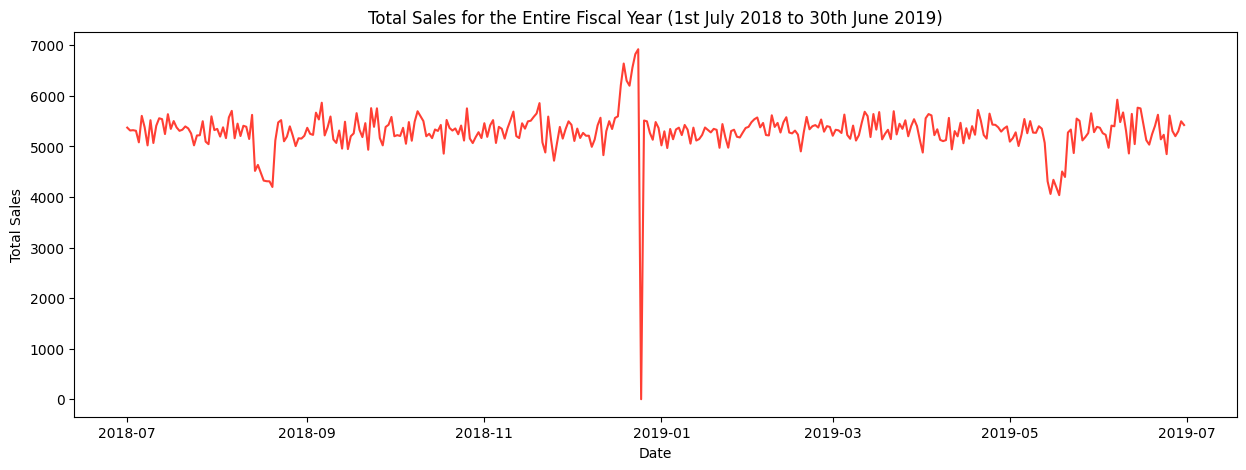

In [ ]:
#   Plotting a line graph of the total sales for each date over the entire recorded duration.

plt.figure(figsize=(15, 5))
plt.plot(date_sales["DATE"], date_sales["TOT_SALES"], color="#ff3f34")
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

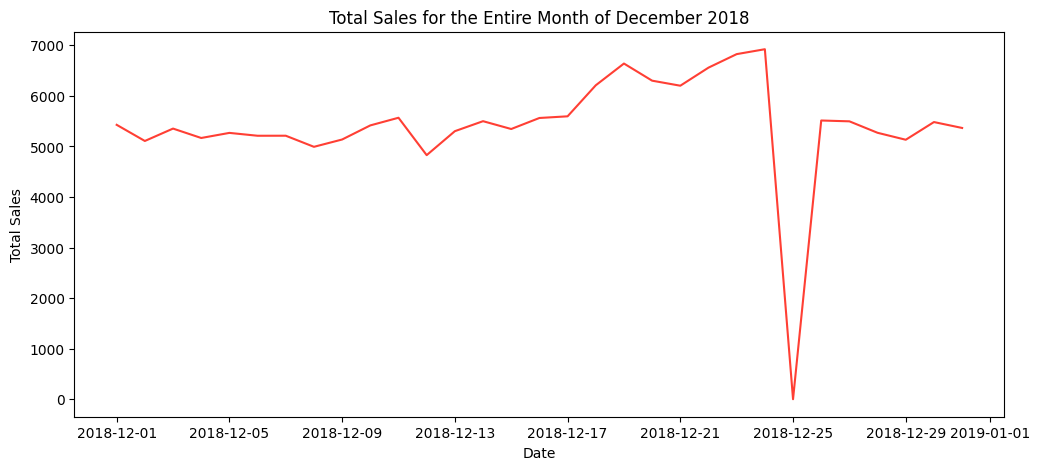

In [ ]:
#   Plotting a line graph of the total sales for each recorded date during December 2018.

plt.figure(figsize=(12, 5))
plt.plot(date_sales["DATE"][date_sales["DATE"].dt.month==12], date_sales["TOT_SALES"][date_sales["DATE"].dt.month==12], color="#ff3f34")
plt.title("Total Sales for the Entire Month of December 2018")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
holiday_sales=dataframe[(dataframe["DATE"]>="2018-12-21") & (dataframe["DATE"]<="2018-12-24")]  #   Extracting entries for the dates between 21st December 2018 and 24th December 2018.
holiday_sales=holiday_sales.sort_values(by="TOT_SALES") #   Sorting the pandas.DataFrame in ascending order of the TOT_SALES column.
holiday_sales=holiday_sales.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
holiday_sales

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-12-24,38,38005,34012,35,Woolworths Mild Salsa 300g,300,Woolworths,1,1.5,OLDER FAMILIES,Budget
1,2018-12-22,186,186218,188613,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,RETIREES,Mainstream
2,2018-12-22,136,136114,138499,35,Woolworths Mild Salsa 300g,300,Woolworths,1,1.5,OLDER SINGLES/COUPLES,Mainstream
3,2018-12-23,255,255077,254619,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,YOUNG FAMILIES,Budget
4,2018-12-22,127,127448,130458,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,OLDER FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
3608,2018-12-23,188,188354,189717,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,OLDER SINGLES/COUPLES,Budget
3609,2018-12-23,4,4172,3436,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,YOUNG SINGLES/COUPLES,Mainstream
3610,2018-12-24,21,21168,17783,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,OLDER FAMILIES,Premium
3611,2018-12-22,130,130222,134588,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,OLDER SINGLES/COUPLES,Premium


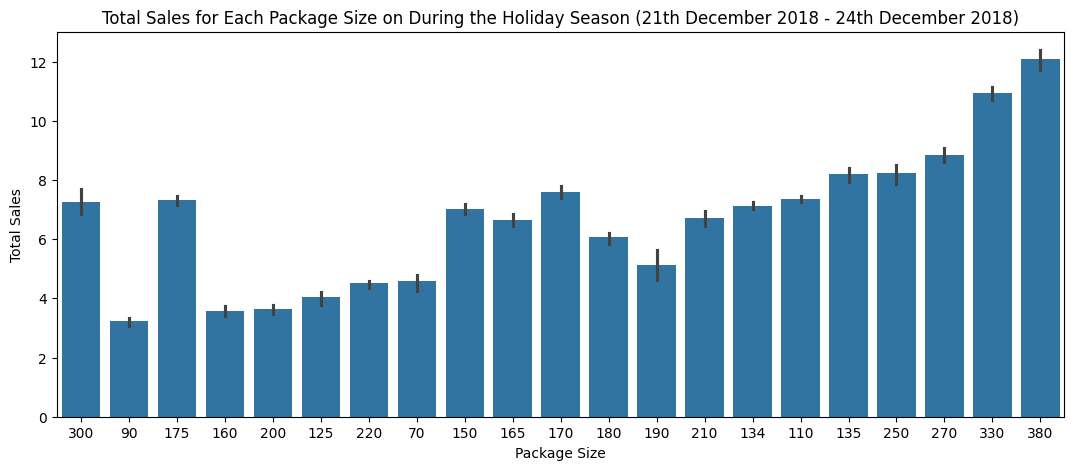

In [ ]:
#   Plotting a bar graph of the total sales for each package size between 21st December 2018 and 24th December 2018.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=holiday_sales)
plt.title("Total Sales for Each Package Size on During the Holiday Season (21th December 2018 - 24th December 2018)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
holiday_brands=holiday_sales.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(5)    #   Grouping the pandas.DataFrame by the TOT_SALES column for each brand, and sorting it in descending order of the TOT_SALES column.
holiday_brands=holiday_brands.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
holiday_brands

,BRAND_NAME,TOT_SALES
0,Kettle,4940.0
1,Doritos,2948.5
2,Smiths,2914.5
3,Pringles,2290.3
4,Thins,1343.1


In [ ]:
package_sales=dataframe.groupby("PROD_SIZE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)   #   Grouping the pandas.DataFrame by the TOT_SALES column for each package size, and sorting it in descending order of the TOT_SALES column.
package_sales=package_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
package_sales

,PROD_SIZE,TOT_SALES
0,175,485437.4
1,150,304288.5
2,134,177655.5
3,110,162765.4
4,170,146673.0
5,330,136794.3
6,300,113330.6
7,165,101360.6
8,380,75419.6
9,270,55425.4


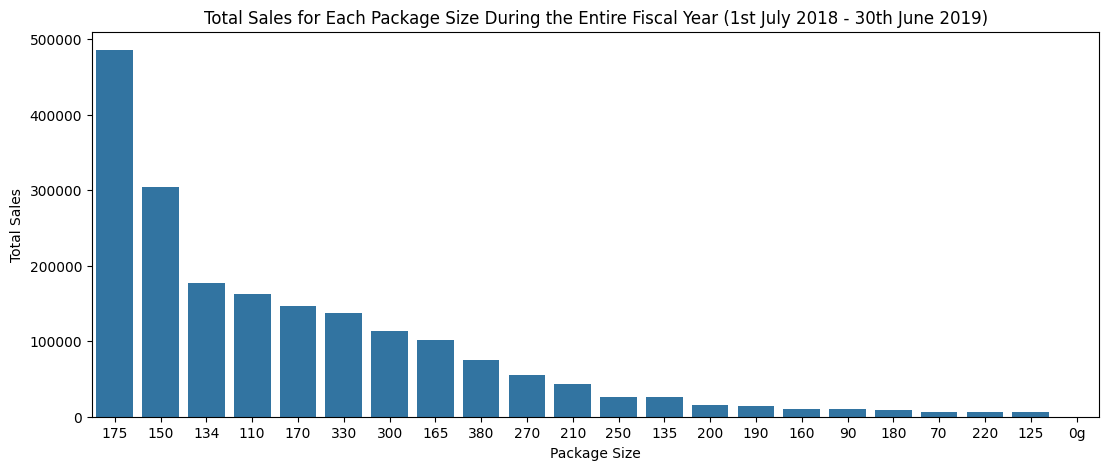

In [ ]:
#   Plotting a bar graph of the total sales for each package size during the entire recorded duration.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=package_sales)
plt.title("Total Sales for Each Package Size During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
brands_sales=dataframe.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(5)  #   Grouping the pandas.DataFrame by the TOT_SALES column for the top five brands, and sorting it in descending order of the TOT_SALES column.
brands_sales=brands_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
brands_sales

,BRAND_NAME,TOT_SALES
0,Kettle,390239.8
1,Smiths,210076.8
2,Doritos,201538.9
3,Pringles,177655.5
4,Old,90785.1


In [ ]:
dataframe["LIFESTAGE"].value_counts()   #   Finding the number of entries for each entry in the LIFESTAGE column in the pandas.DataFrame.


,count
LIFESTAGE,
OLDER SINGLES/COUPLES,54479
RETIREES,49763
OLDER FAMILIES,48594
YOUNG FAMILIES,43592
YOUNG SINGLES/COUPLES,36377
MIDAGE SINGLES/COUPLES,25110
NEW FAMILIES,6919
None,2


In [ ]:
customer_sales=dataframe.groupby("LIFESTAGE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(7) #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage, and sorting it in descending order of the TOT_SALES column.
customer_sales=customer_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
customer_sales

,LIFESTAGE,TOT_SALES
0,OLDER SINGLES/COUPLES,402426.75
1,RETIREES,366470.90
2,OLDER FAMILIES,352467.20
3,YOUNG FAMILIES,316160.10
4,YOUNG SINGLES/COUPLES,260405.30
5,MIDAGE SINGLES/COUPLES,184751.30
6,NEW FAMILIES,50433.45


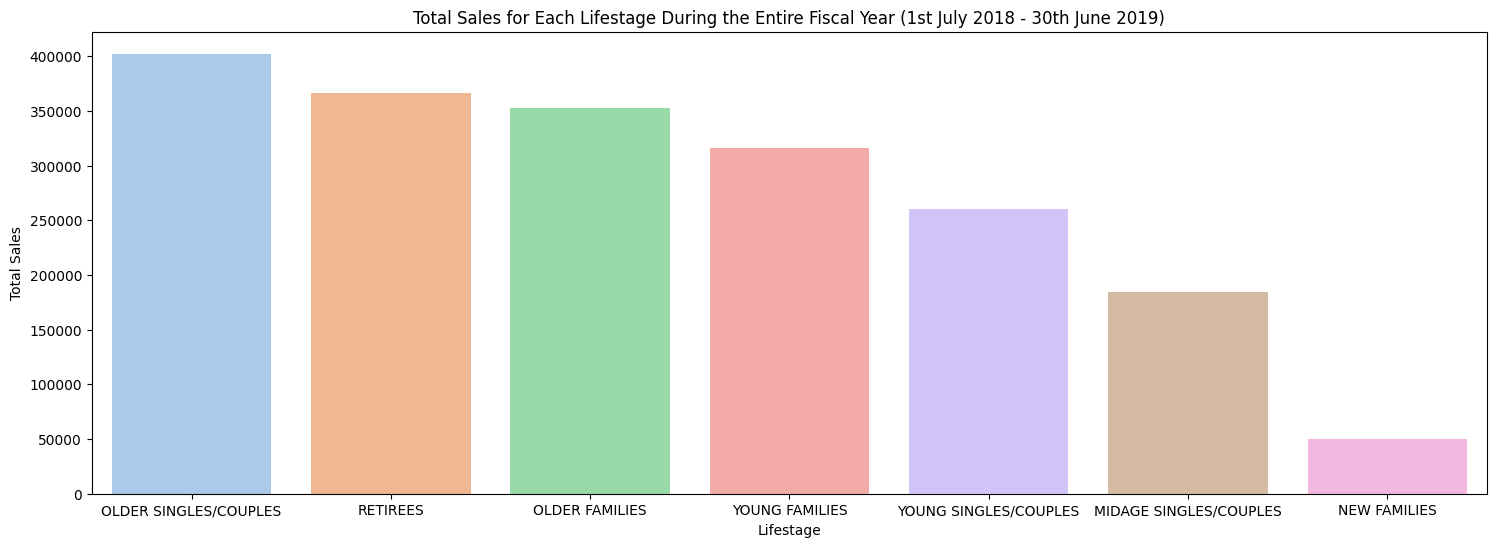

In [ ]:

#   Plotting a bar graph of the total sales for each lifestage during the entire recorded duration.

plt.figure(figsize=(18, 6))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", data=customer_sales, palette="pastel")
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
lifestage_sales=dataframe.groupby(["LIFESTAGE", "DATE"])["TOT_SALES"].sum().reset_index()  #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and date.
lifestage_sales=lifestage_sales[lifestage_sales["LIFESTAGE"]!="None"]   #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_sales

,LIFESTAGE,DATE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,2018-07-01,576.8
1,MIDAGE SINGLES/COUPLES,2018-07-02,589.5
2,MIDAGE SINGLES/COUPLES,2018-07-03,482.2
3,MIDAGE SINGLES/COUPLES,2018-07-04,604.5
4,MIDAGE SINGLES/COUPLES,2018-07-05,531.6
...,...,...,...
2544,YOUNG SINGLES/COUPLES,2019-06-26,687.4
2545,YOUNG SINGLES/COUPLES,2019-06-27,743.4
2546,YOUNG SINGLES/COUPLES,2019-06-28,840.7
2547,YOUNG SINGLES/COUPLES,2019-06-29,924.5


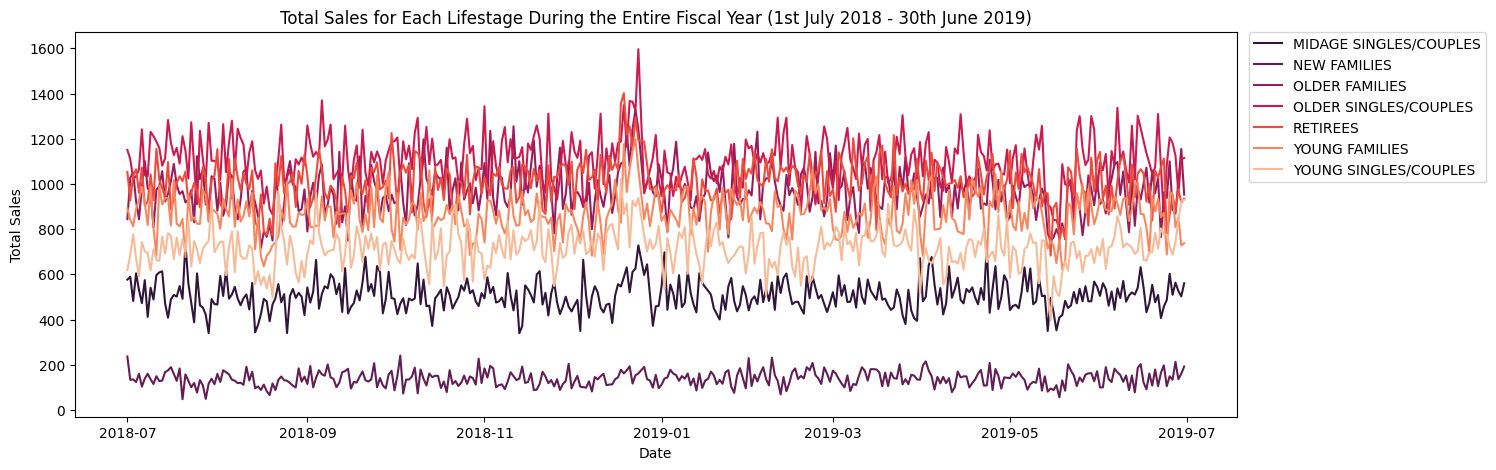

In [ ]:
#   Plotting a multi-line graph of the total sales for each lifestage during the entire recorded duration.

plt.figure(figsize=(15, 5))
sns.lineplot(x="DATE", y="TOT_SALES", hue="LIFESTAGE", data=lifestage_sales, palette="rocket")
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
lifestage_segment=dataframe.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False]) #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and customer segment, and sorting it in descending order of the TOT_SALES column.
lifestage_segment=lifestage_segment[lifestage_segment["LIFESTAGE"]!="None"] #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_segment=lifestage_segment.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
lifestage_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
1,MIDAGE SINGLES/COUPLES,Premium,58432.65
2,MIDAGE SINGLES/COUPLES,Budget,35514.80
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,80658.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


In [ ]:
lifestage_brands=dataframe.groupby(["LIFESTAGE", "BRAND_NAME", "PREMIUM_CUSTOMER", "PROD_SIZE"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False])  #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and brand, and sorting it in descending order of the TOT_SALES column.
lifestage_brands=lifestage_brands[lifestage_brands["LIFESTAGE"]!="None"]    #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_brands=lifestage_brands.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
midage=lifestage_brands[lifestage_brands["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES"]    #   Storing the entries for MIDAGE SINGLES/COUPLES into a separate pandas.DataFrame.
midage

,LIFESTAGE,BRAND_NAME,PREMIUM_CUSTOMER,PROD_SIZE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Kettle,Mainstream,175,10557.0
1,MIDAGE SINGLES/COUPLES,Kettle,Mainstream,150,8381.2
2,MIDAGE SINGLES/COUPLES,Pringles,Mainstream,134,8177.0
3,MIDAGE SINGLES/COUPLES,Kettle,Premium,175,5815.8
4,MIDAGE SINGLES/COUPLES,Pringles,Premium,134,5538.9
...,...,...,...,...,...
133,MIDAGE SINGLES/COUPLES,Snbts,Mainstream,90,120.7
134,MIDAGE SINGLES/COUPLES,Cheezels,Budget,125,105.0
135,MIDAGE SINGLES/COUPLES,Sunbites,Mainstream,90,103.7
136,MIDAGE SINGLES/COUPLES,Sunbites,Budget,90,96.9


In [ ]:
#   Creating a new pandas.DataFrame with the Recency, Frequency and Monetary (RFM) values for each customer based on the LYLTY_CARD_NBR.

rfm=dataframe.groupby("LYLTY_CARD_NBR")["TOT_SALES"].agg(["sum", "count"]).reset_index()    #   Grouping the pandas.DataFrame by the TOT_SALES column for each customer, and aggregating the sum and count.
rfm.columns=["LYLTY_CARD_NBR", "MONETARY", "FREQUENCY"] #   Renaming the columns of the pandas.DataFrame.
rfm["RECENCY"]=(datetime.datetime.strptime("2019-06-30", "%Y-%m-%d")-dataframe.groupby("LYLTY_CARD_NBR")["DATE"].max()).dt.days #   Calculating the Recency value for each customer.
rfm=rfm.dropna()    #   Dropping the null values from the pandas.DataFrame.
rfm=rfm.reset_index(drop=True)

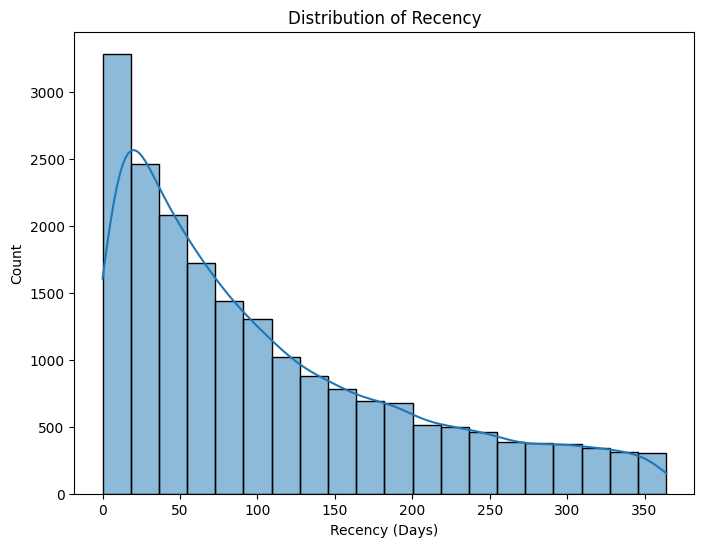

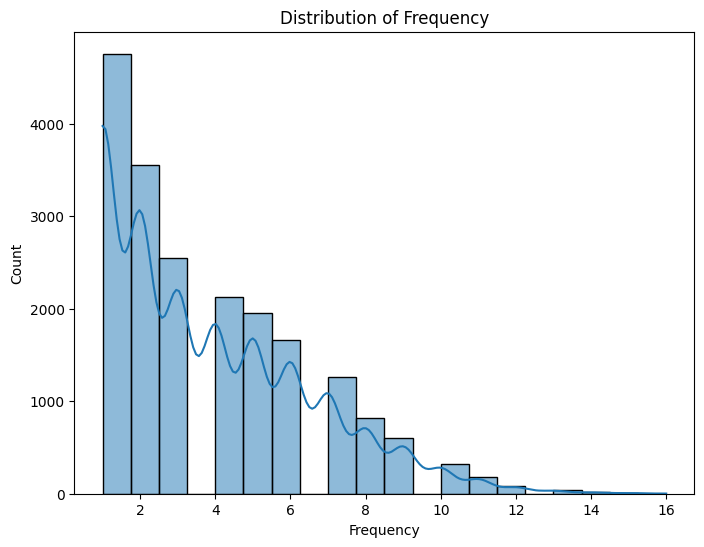

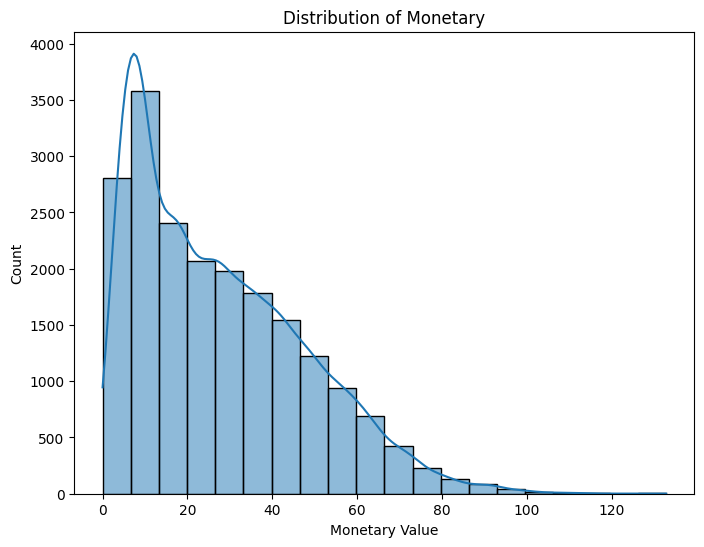

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Recency
plt.figure(figsize=(8, 6))
sns.histplot(rfm["RECENCY"], bins=20, kde=True)
plt.title("Distribution of Recency")
plt.xlabel("Recency (Days)")
plt.ylabel("Count")
plt.show()

# Distribution of Frequency
plt.figure(figsize=(8, 6))
sns.histplot(rfm["FREQUENCY"], bins=20, kde=True)
plt.title("Distribution of Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

# Distribution of Monetary
plt.figure(figsize=(8, 6))
sns.histplot(rfm["MONETARY"], bins=20, kde=True)
plt.title("Distribution of Monetary")
plt.xlabel("Monetary Value")
plt.ylabel("Count")
plt.show()

In [ ]:
dataframe.to_csv("QVI_data.csv", index=False)   #   Saving the finalised pandas.DataFrame as a CSV file.
